Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). We use it to model probabilites of said outcomes and can use the resulting probability to set a label of 0 or 1. It can also be extended for K outcomes (called multinomial logistic regression) but for now let's look at the simplest case of modelling zeroes and ones.

Let's start again by defining the model.

$Y = X\beta + \epsilon$

The definition looks exactly like the one for linear regression, however there is a catch that out dependent variable ($Y$) is defined very differently.  

$Y \equiv  log(\frac{p(x)}{1-p(x)})$

Thus we can express $p$  
as $p(x) = \frac{1}{1+e^{-X\beta+\epsilon}}$ (1)



We'll need some knowledge of the sigmoid function to proceed, so let's define it here 

$ \sigma(x) = \frac{1}{1+e^{-x}} $  (2)
Also it's derivative will be useful so let's derive it here for later use  
$ \sigma'(x) = (\frac{1}{1+e^{-x}})' =  (\frac{0*(1+e^{-x})-1*(1+e^{-x})'}{(1+e^{-x})^2}) = \frac{e^{-x}}{(1+e^{-x})^2}$  
$ \sigma'(x) = \frac{1-1+e^{-x}}{(1+e^{-x})^2} =  \frac{1+e^{-x}}{(1+e^{-x})^2} - \frac{1}{(1+e^{-x})^2} = \frac{1}{(1+e^{-x})} - \frac{1}{(1+e^{-x})^2} =
\frac{1}{(1+e^{-x})}(1-\frac{1}{(1+e^{-x})}) $  
$\sigma'(x) =\sigma(x)(1-\sigma(x))$

It's derivative can be expressed as a quire simple combination of the original function which is very nice.

Lastly, let's take a look at its graph to appreciate the properties

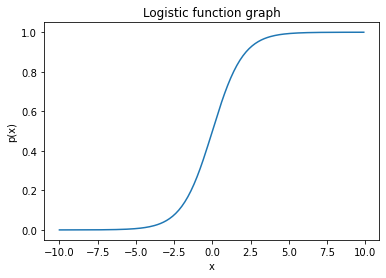

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x=np.arange(-10, 10, 0.1)
e=2.71828
p=1/(1+e**(-x))

plt.plot(x, p)
plt.title('Logistic function graph')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

That's a nice looking non-linear function that can obtain values in the interval [0; 1]. That is probably one of the reasons why it used to model probabilities.

Now we have everything we need, the model is defined we have all the necessary prelimenaries to help us in the future calculations.
We need to define the cost function for the model which is usually defined like this:

\begin{equation}
  L(\beta;y) =
    \begin{cases}
      -log(h(x)) & if  y = 1 \\
      -log(1-h(x)) & if y = 0  \\
    \end{cases}       
\end{equation}

Now we can sum error for all data points:  
$L(\beta;y)= -\frac{1}{m}\Sigma_n[y_i*log(h(x_i)) + (1-y_i)*log(1-h(x))] $

We have the cost function and we can take its derivative. I split the expression into two sums ($L_1$ and  $L_2$) for easier readability 

$L_1(\beta;y)'= -\frac{1}{m}\Sigma_n [y_i\frac{1}{h(x)}(1-h(x) )h(x)\frac{\partial x\beta}{\beta } ]$  
$L_2(\beta;y)'= -\frac{1}{m}\Sigma_n [(1-y_i)\frac{1}{1-h(x)} (-h(x))  (1-h(x)\frac{\partial x\beta}{\beta } )]$


That's a nice looking non-linear function that can obtain values in the interval [0; 1]. That is probably one of the reasons why it used to model probabilities.

Now we have everything we need, the model is defined we have all the necessary prelimenaries to help us in the future calculations.
We need to define the cost function for the model which is usually defined like this:

\begin{equation}
  L(\beta;y) =
    \begin{cases}
      -log(h(x)) & if  y = 1 \\
      -log(1-h(x)) & if y = 0  \\
    \end{cases}       
\end{equation}

Now we can sum error for all data points:  
$L(\beta;y)= -\frac{1}{m}\Sigma_n[y_i*log(h(x_i)) + (1-y_i)*log(1-h(x))] $

We have the cost function and we can take its derivative. I split the expression into two sums ($L_1$ and  $L_2$) for easier readability. Also I'm taking partial derivatives $\partial \beta$ so when I write $\beta$ I really mean $\beta_j$ this also goes for $x$ it is really a column $j$ vector of $x$ i.e. $x_j$. It's not a really good thing to do, but the notation can get unwieldy if we include all the indexes.

$L_1(\beta;y)= -\frac{1}{m}\Sigma_n [y_i\frac{1}{h(x)}(1-h(x) )h(x)\frac{\partial x\beta}{\beta } ] = -\frac{1}{m}\Sigma_n[ y_i(1-h(x))x_i)] $  
$L_2(\beta;y)'= -\frac{1}{m}\Sigma_n [(1-y_i)\frac{1}{1-h(x)} (-h(x))  (1-h(x)\frac{\partial x\beta}{\beta } )]= -\frac{1}{m}\Sigma_n[ (1-y_i)h(x)x_i] $  

Now add them up back together  
$L_1 = -\frac{1}{m}\Sigma_n[ y_i(1-h(x))x_i -  (1-y_i)h(x)x_i] = -\frac{1}{m}\Sigma_n[y_i - y_ih(x)x_i - h(x)x + y_ih(x)x_i = -\frac{1}{m}\Sigma_n[y_ix_i - h(x)x_i] =-\frac{1}{m}\Sigma_nx^T_i(y-h(x)) $  

And in matrix form it would look like:
$\frac{\nabla L}{\nabla \beta}=X^T(y-H(\beta))$

It looks just like the derivative for linear regression meaning we can use the same update rule:


$$\beta_{t+1} = \beta_t - \alpha \frac{\partial L(\beta)}{\partial \beta_t}$$


In [239]:
#Equation (1)
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [266]:
def gradient_descent_logistic_regression(X, Y, add_intercept = True, learningrate = 0.001, iterations = 100000):
    y_real = np.reshape(Y, (len(Y), 1))   
    cost_list = []
    m=X.shape[0]

    if add_intercept:
        X = np.c_[np.ones((len(X), 1)), X]

    beta = np.random.randn(X.shape[1], 1)
    
    for i in range(iterations):
        #Equation (1)
        prob=sigmoid(X.dot(beta))
        gradient = 2/m * X.T.dot(prob - y_real)
        beta = beta - learningrate * gradient
        #y_hat = sigmoid(X.dot(beta))
        #cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
        #Calculate the loss for each training instance
        #cost_lst.append(cost_value)
        #Equation (0)
    return beta

In [292]:
# An example
import random
N=1000

np.random.seed(42)
x1=np.array(random.choices([0.,1.], k=N))
x2=np.round(np.random.uniform(18,80,N),0)
X=np.stack((x1, x2)).T
X = np.c_[np.ones((len(X), 1)), X]
beta=[-5., 3.5, 0.2]

z = np.dot(X, beta)
prob = sigmoid(z)
y = np.random.binomial(1, prob.flatten())

In [293]:
beta_hat=gradient_descent_logistic_regression(X = X, Y = y, add_intercept = False, learningrate = 0.004, iterations = 100000)
beta_hat

array([[-4.47986954],
       [ 2.57902655],
       [ 0.18501556]])

Now we can fit the same model using sklearn to check our result

In [294]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=0, fit_intercept = False, penalty = None)
model.fit(X, np.ravel(y))
model.coef_

array([[-5.02573467,  2.72122279,  0.20342166]])

Well close enough :)